**Introduction to k Nearest Neighbours algorithm**

In machine learning, k Nearest Neighbours or kNN is the simplest of all machine learning algorithms. It is a non-parametric algorithm used for classification and regression tasks. Non-parametric means there is no assumption required for data distribution. So, kNN does not require any underlying assumption to be made. In both classification and regression tasks, the input consists of the k closest training examples in the feature space. The output depends upon whether kNN is used for classification or regression purposes.



*   In kNN classification, the output is a class membership. The given data point is classified based on the majority of type of its neighbours. The data point is assigned to the most frequent class among its k nearest neighbours. Usually k is a small positive integer. If k=1, then the data point is simply assigned to the class of that single nearest neighbour.
*   In kNN regression, the output is simply some property value for the object. This value is the average of the values of k nearest neighbours.


kNN is a type of instance-based learning or lazy learning. Lazy learning means it does not require any training data points for model generation. All training data will be used in the testing phase. This makes training faster and testing slower and costlier. So, the testing phase requires more time and memory resources.

In kNN, the neighbours are taken from a set of objects for which the class or the object property value is known. This can be thought of as the training set for the kNN algorithm, though no explicit training step is required. In both classification and regression kNN algorithm, we can assign weight to the contributions of the neighbours. So, nearest neighbours contribute more to the average than the more distant ones.

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Importing datasets**

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_wisconsin_data_altered.csv to breast_cancer_wisconsin_data_altered.csv


In [ ]:
df  = pd.read_csv(io.BytesIO(uploaded['breast_cancer_wisconsin_data_altered.csv']))

**Exploratory data analysis**

In [ ]:
# view dimensions of dataset

df.shape

(699, 11)

In [ ]:
# preview the dataset

df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,4
1,1002945,5,4,4,5,7,10.0,3,2,1,4
2,1015425,3,1,1,1,2,2.0,3,1,1,4
3,1016277,6,8,8,1,3,4.0,3,7,1,4
4,1017023,4,1,1,3,2,1.0,3,1,1,4


1. **Clump Thickness:** Assesses if cells are mono- or multi-layered.
2. **Unif Cell Size (Uniformity of Cell Size):** Evaluates the consistency in size of the cells in the sample.
3. **Unif cell shape (Uniformity of Cell Shape):** Estimates the equality of cell shapes and identifies marginal variances.
4. **Marg Adhesion (Marginal Adhesion):** Quantifies how much cells on the outside of the epithelial tend to stick together.
5. **single_epith_cell_size (Single Epithelial Cell Size):** Relates to cell uniformity, determines if epithelial cells are significantly enlarged.
6. **Bare Nuclei:** Calculates the proportion of the number of cells not surrounded by cytoplasm to those that are.
7. **Blan chrom (Bland Chromatin):** 	Rates the uniform "texture" of the nucleus in a range from fine to coarse.
8. **Norm nucleoli (Normal Nucleoli):** Determines whether the nucleoli are small and barely visible or larger, more visible, and more plentiful.
9. **Mitoses:** Describes the level of mitotic (cell reproduction) activity.

In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      699 non-null    int64  
 1   clump_thickness         699 non-null    int64  
 2   unif_cell_size          699 non-null    int64  
 3   unif_cell_shape         699 non-null    int64  
 4   marg_adhesion           699 non-null    int64  
 5   single_epith_cell_size  699 non-null    int64  
 6   bare_nuclei             683 non-null    float64
 7   bland_chrom             699 non-null    int64  
 8   norm_nucleoli           699 non-null    int64  
 9   mitoses                 699 non-null    int64  
 10  class                   699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [ ]:
df.describe().round(2)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
count,699.00,699.00,699.00,699.00,699.00,699.00,683.00,699.00,699.00,699.00,699.00
mean,1071704.10,4.42,3.13,3.21,2.81,3.22,3.54,3.44,2.87,1.59,2.69
std,617095.73,2.82,3.05,2.97,2.86,2.21,3.64,2.44,3.05,1.72,0.95
min,61634.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,870688.50,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,1171710.00,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00
75%,1238298.00,6.00,5.00,5.00,4.00,4.00,6.00,5.00,4.00,1.00,4.00
max,13454352.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


In [ ]:
# drop Id column from dataset

df.drop('id', axis=1, inplace=True)

In [ ]:
# check missing values in variables

df.isnull().sum()

clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marg_adhesion              0
single_epith_cell_size     0
bare_nuclei               16
bland_chrom                0
norm_nucleoli              0
mitoses                    0
class                      0
dtype: int64

In [ ]:
# check frequency distribution of `Bare_Nuclei` column

df['bare_nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: bare_nuclei, dtype: int64

In [ ]:
# impute missing values with median
for col in df.columns:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True)

In [ ]:
# view frequency distribution of values in `Class` variable

df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [ ]:
# view percentage of frequency distribution of values in `Class` variable

df['class'].value_counts()/np.float(len(df))

2    0.655222
4    0.344778
Name: class, dtype: float64

**Data Visualization**

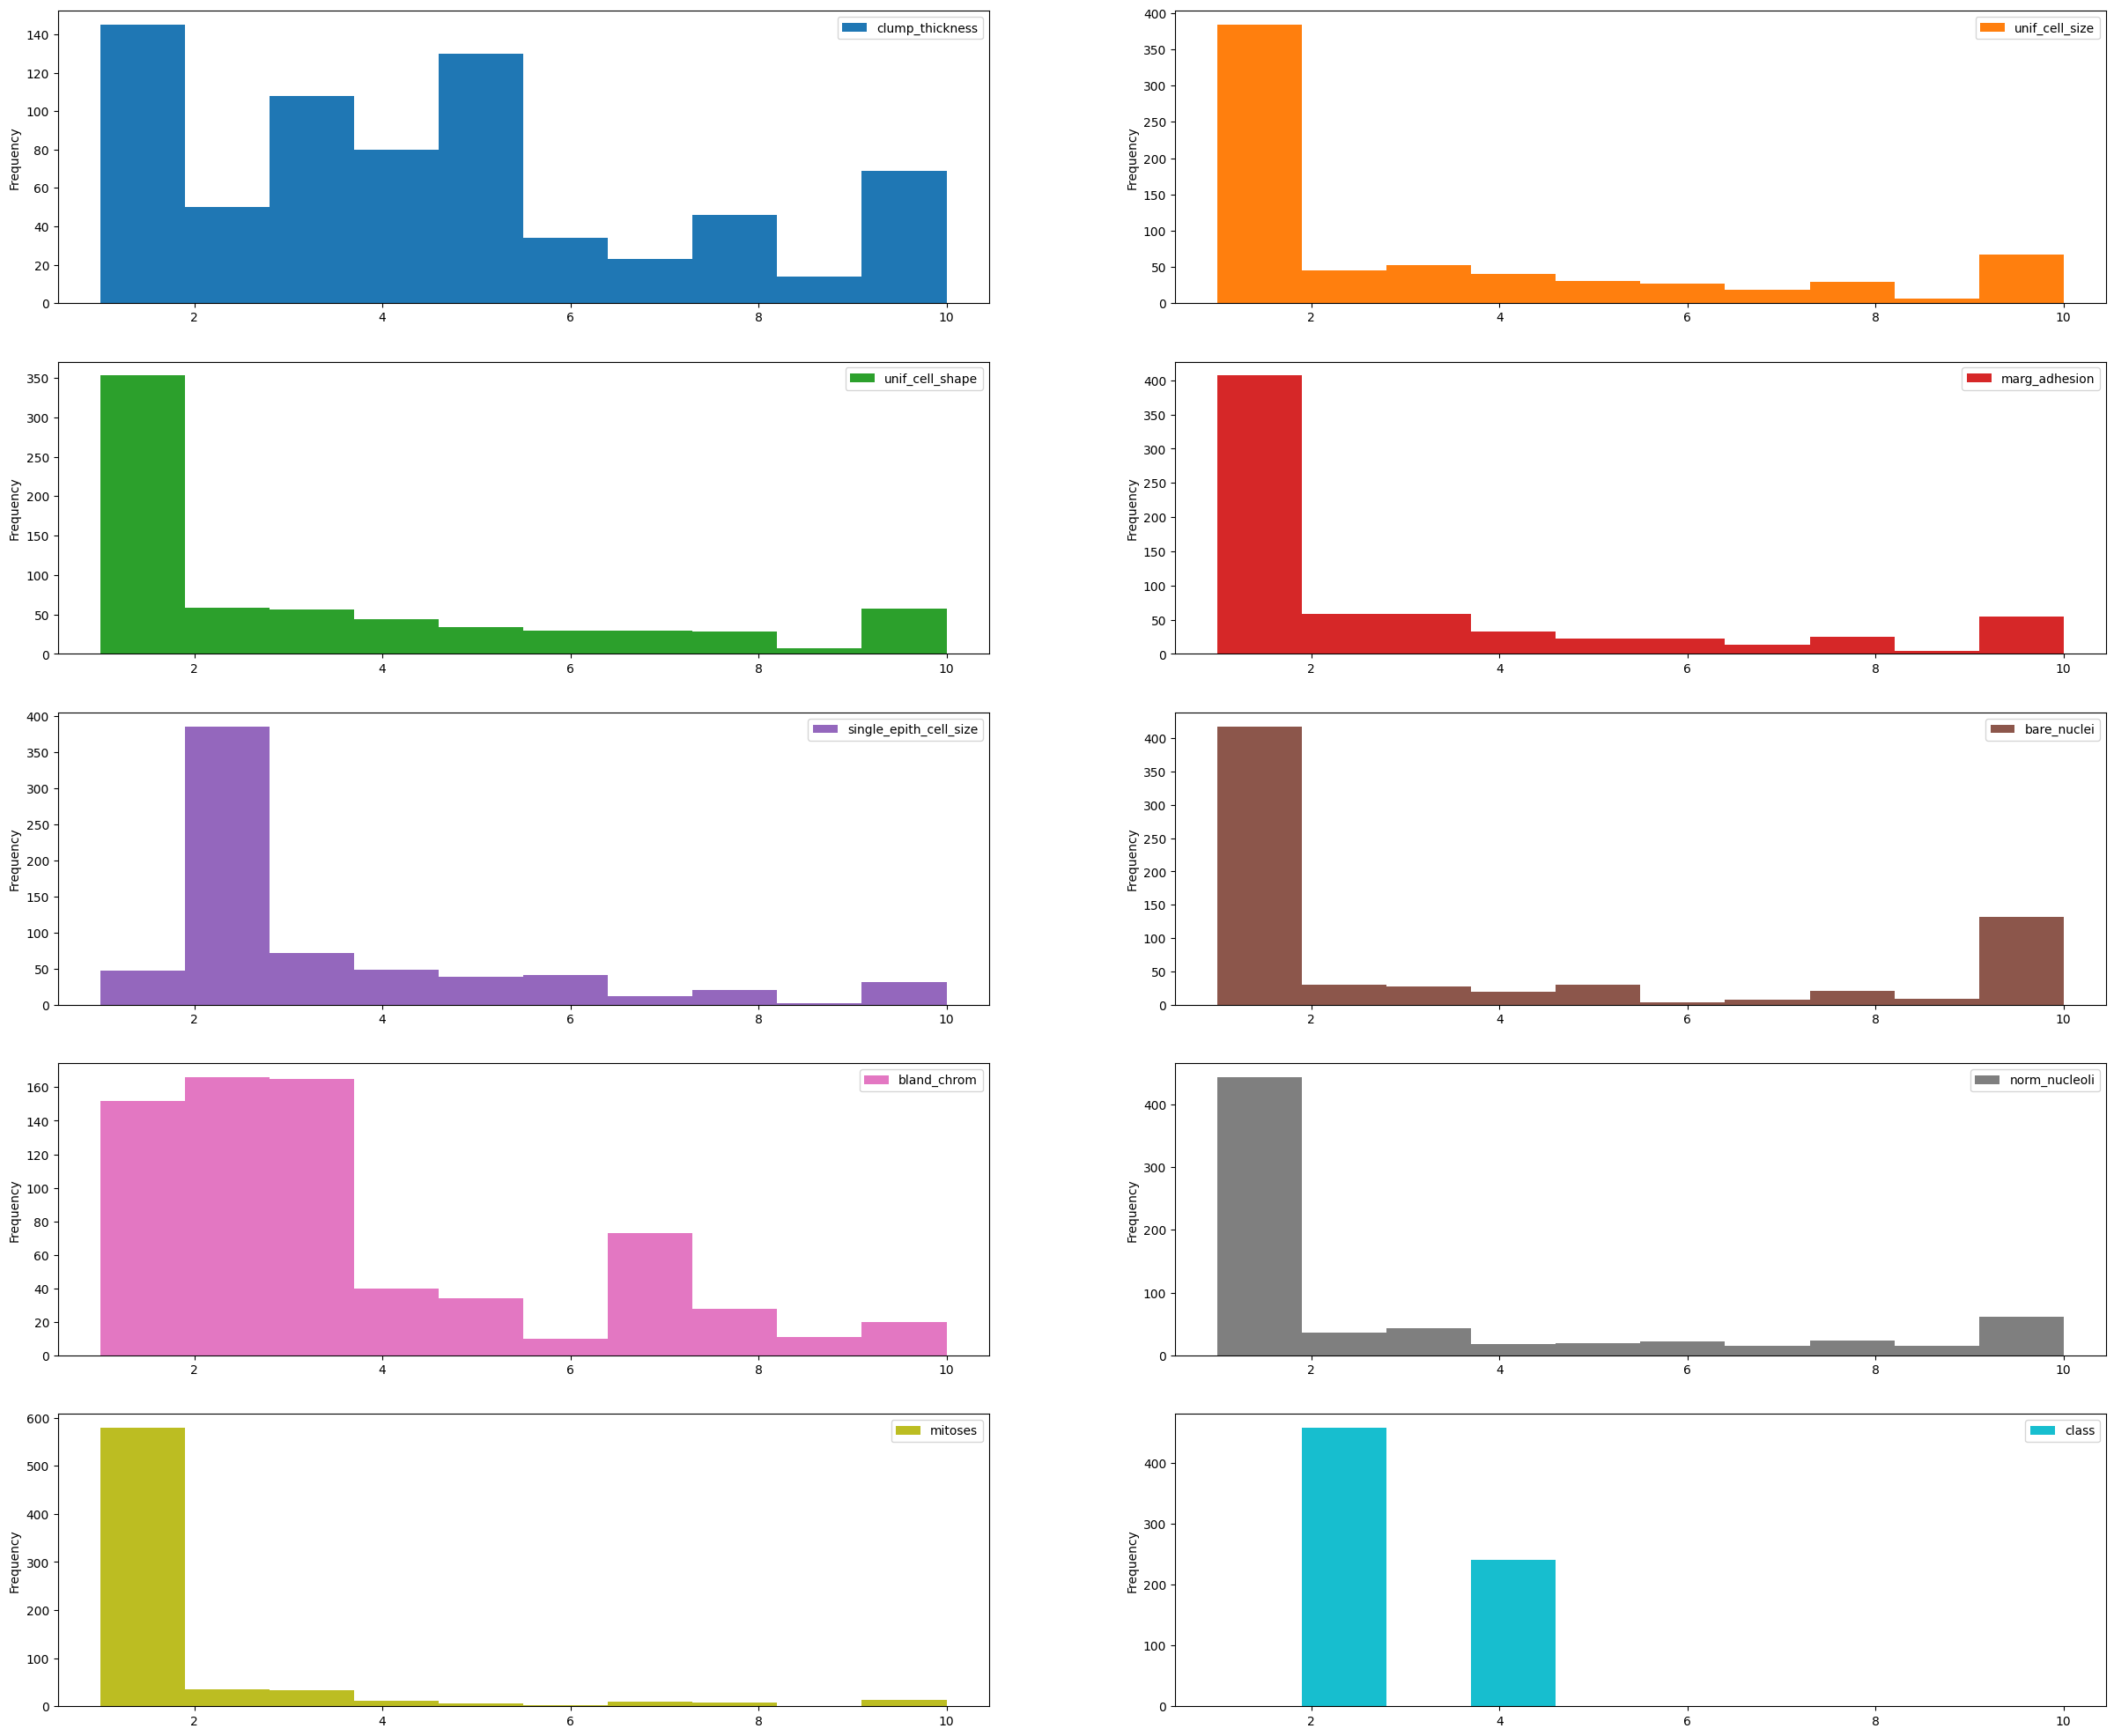

In [ ]:
# plot histograms of the variables

plt.rcParams['figure.figsize']=(30,25)
df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

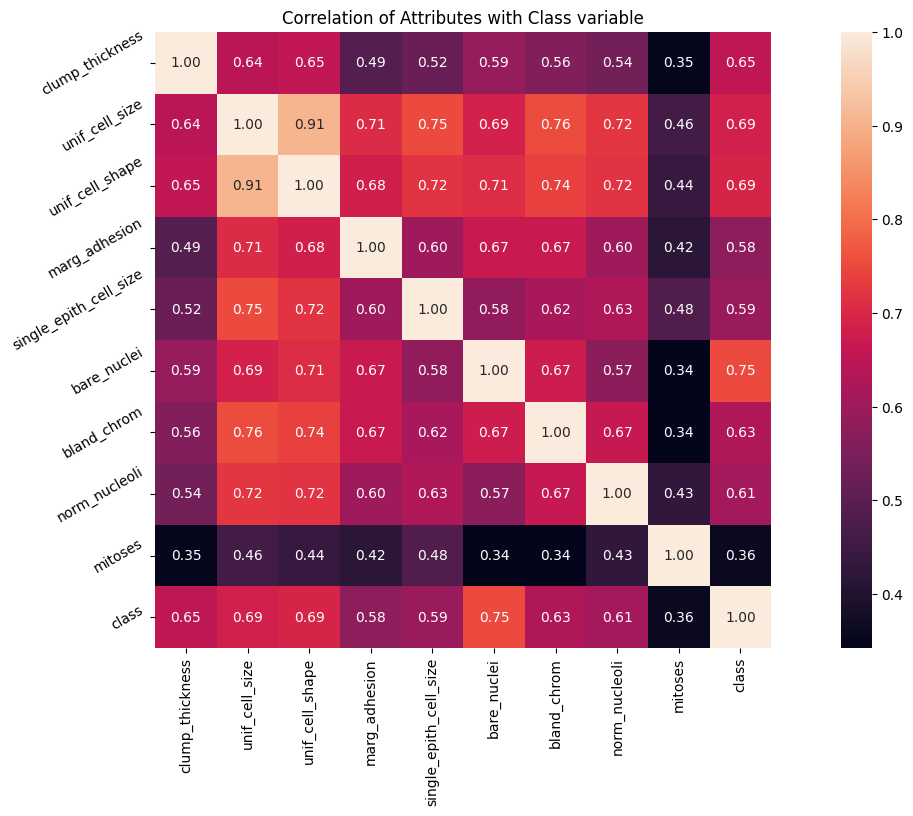

In [ ]:
correlation = df.corr()

plt.figure(figsize=(18,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
correlation['class'].sort_values(ascending=False)

class                     1.000000
bare_nuclei               0.753269
unif_cell_shape           0.693257
unif_cell_size            0.685632
clump_thickness           0.652887
bland_chrom               0.625675
norm_nucleoli             0.611631
single_epith_cell_size    0.594365
marg_adhesion             0.577598
mitoses                   0.361702
Name: class, dtype: float64

**Splitting data into test and train**

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((559, 9), (140, 9))

**Feature Scaling**

In [ ]:
cols = X_train.columns

In [ ]:
#StandardScaler removes the mean and scales each feature/variable to unit variance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

print("Data type before standard scaler: ",type(X_train))

#We will scale the test data exactly same as how we have scaled the train data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data type after standard scaler: ",type(X_train))

Data type before standard scaler:  <class 'pandas.core.frame.DataFrame'>
Data type after standard scaler:  <class 'numpy.ndarray'>


In [ ]:
#You will notice that data type has changed from "pandas dataframe" to numpy array after the conversion. Hence changing it back to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses
0,-1.223389,-0.695709,-0.738051,0.088606,-1.010385,-0.140603,-1.007285,-0.608587,-0.34644
1,-1.223389,-0.695709,-0.738051,-0.624066,0.350591,-0.140603,-1.007285,-0.608587,-0.34644
2,0.223199,-0.363882,-0.066112,-0.624066,1.257909,1.783104,0.656149,-0.608587,-0.34644
3,-0.138448,-0.695709,-0.738051,-0.624066,-0.556726,-0.690234,-0.591427,-0.608587,-0.34644
4,0.223199,-0.695709,-0.738051,-0.624066,-0.556726,-0.690234,-0.175568,-0.608587,-0.34644


In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (randomly picking the value of "K" as 3)
knn = KNeighborsClassifier(n_neighbors=3)
# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Predicting on train data
y_pred_train = knn.predict(X_train)

#Predicting on test data
y_pred_test = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model train accuracy score:', accuracy_score(y_train, y_pred_train).round(2))
print('Model test accuracy score:', accuracy_score(y_test, y_pred_test).round(2))

Model train accuracy score: 0.93
Model test accuracy score: 0.86


**Finding optimum value of K**

In [ ]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

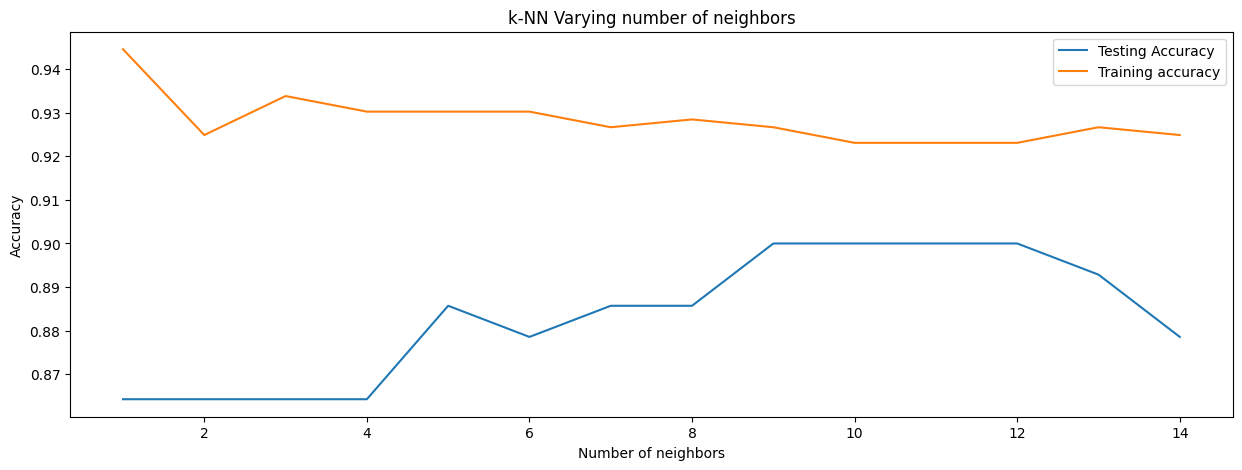

In [ ]:
#Generate plot
plt.figure(figsize=(15,5))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Accuracy of model has improved from 86% to 90% by optimizing the model parameter "K"

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=9)
# fit the model to the training set
knn.fit(X_train, y_train)

print("Our train accuracy is: ",knn.score(X_train, y_train).round(2))
print("Our test accuracy is: ",knn.score(X_test, y_test).round(2))

Our train accuracy is:  0.93
Our test accuracy is:  0.9
